In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy import stats
#import os

In [2]:

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
clinical_trial_data = pd.pandas.read_csv("clinicaltrial_data.csv")

clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
clinical_table = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")


# Display the data table for preview
clinical_table.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:

tumor_mean = clinical_table.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumor_mean = pd.DataFrame(tumor_mean)
tumor_mean.reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = clinical_table.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_sem = pd.DataFrame(tumor_sem)
tumor_sem.reset_index()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
# Minor Data Munging to Re-Format the Data Frames

tumor = pd.pivot_table(tumor_mean, values='Tumor Volume (mm3)',index='Timepoint',columns='Drug')

tumor.head()

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


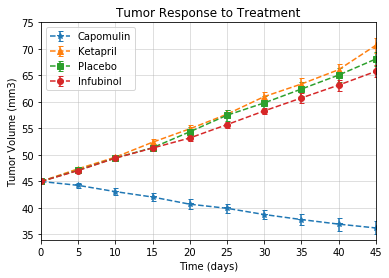

<Figure size 432x288 with 0 Axes>

In [7]:
# This scatter plot shows how the tumor volume changes over time for each treatment.
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Capomulin", "Tumor Volume (mm3)"],
             yerr = tumor_sem.loc["Capomulin", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Ketapril", "Tumor Volume (mm3)"],
             yerr = tumor_sem.loc["Ketapril", "Tumor Volume (mm3)"], fmt = '^--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Placebo", "Tumor Volume (mm3)"],
             yerr = tumor_sem.loc["Placebo", "Tumor Volume (mm3)"], fmt = 's--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0, 50, 5), tumor_mean.loc["Infubinol", "Tumor Volume (mm3)"],
             yerr = tumor_sem.loc["Infubinol", "Tumor Volume (mm3)"], fmt = 'o--', capsize = 2.5, label = "Infubinol")

# Add legend
plt.legend(loc='best')

# Add gridlines
plt.grid(alpha = 0.5)

# Add labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(34,75)

# Plot the graph
plt.show()

plt.savefig('Tumor Response to Treatment.png')

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = clinical_table.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
meta_mean

# Convert to DataFrame
meta_mean = pd.DataFrame(meta_mean)


# Preview DataFrame
meta_mean

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [9]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = clinical_table.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
meta_sem

# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem)
meta_sem
# Preview DataFrame

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [10]:
 # Minor Data Munging to Re-Format the Data Frames
    
meta_table = pd.pivot_table(meta_mean, values='Metastatic Sites',index='Timepoint',columns='Drug')
meta_table
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


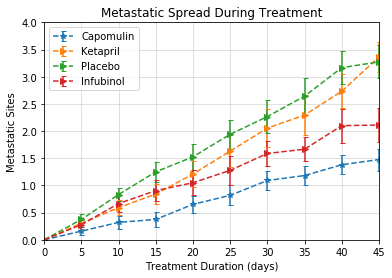

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(np.arange(0, 50, 5), meta_mean.loc["Capomulin", "Metastatic Sites"],
             yerr = meta_sem.loc["Capomulin", "Metastatic Sites"], fmt = '*--', capsize = 2.5, label = "Capomulin")
plt.errorbar(np.arange(0,50,5), meta_mean.loc["Ketapril", "Metastatic Sites"],
            yerr = meta_sem.loc["Ketapril", "Metastatic Sites"], fmt = '>--', capsize = 2.5, label = "Ketapril")
plt.errorbar(np.arange(0,50,5), meta_mean.loc["Placebo", "Metastatic Sites"],
            yerr = meta_sem.loc["Placebo", "Metastatic Sites"], fmt = '>--', capsize = 2.5, label = "Placebo")
plt.errorbar(np.arange(0,50,5), meta_mean.loc["Infubinol", "Metastatic Sites"],
            yerr = meta_sem.loc["Infubinol", "Metastatic Sites"], fmt = '>--', capsize = 2.5, label = "Infubinol")

plt.legend(loc='best')

plt.grid(alpha = 0.5)

# Add labels
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Metastatic Sites')

# Add x limits and y limits
plt.xlim(0,45)
plt.ylim(0,4)

# Plot the graph
plt.show()

# Save the Figure

plt.savefig('Metastatic Spread During Treatment.png')

In [22]:
 # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = clinical_table.groupby(['Drug','Timepoint'])["Mouse ID"].count()

# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_count
mouse_count.columns = mouse_count.columns.str.strip()
mouse_count.reset_index()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [23]:
mouse_table = pd.pivot_table(mouse_count,values='Mouse ID',index ='Timepoint', columns='Drug')
mouse_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


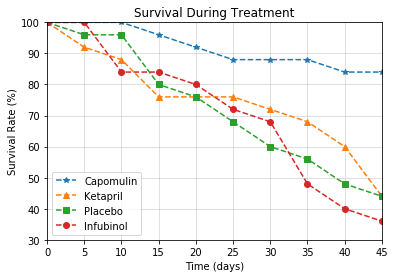

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Capomulin", "Mouse ID"]/25,
         marker = '*',label = 'Capomulin', linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Ketapril", "Mouse ID"]/25,
         marker = '^', label = "Ketapril", linestyle = '--')
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Placebo", "Mouse ID"]/25,
         marker = 's', label = "Placebo", linestyle ='--')
plt.plot(np.arange(0, 50, 5), 100*mouse_count.loc["Infubinol", "Mouse ID"]/25,
         marker = 'o', label = "Infubinol", linestyle ='--')

# # Add legend
plt.legend(loc="best")

# # Add gridlines
plt.grid(alpha = 0.5)

# # Add labels
plt.title('Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')

# # Add x limits and y limits
plt.xlim(0,45)
plt.ylim(30,100)

# # Plot the graph
plt.show()
plt.savefig('Survival During Treatment.png')

In [35]:
# Calculate the percent changes for each drug
pct_change =  100 * (tumor.iloc[-1] - tumor.iloc[0]) / tumor.iloc[0]
pct_change_sem =  100 * (tumor_sem.iloc[-1] - tumor_sem.iloc[0]) / tumor_sem.iloc[0]

# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

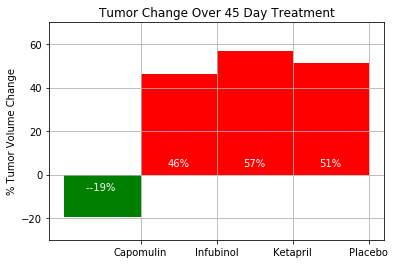

In [36]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (drug_pct_change["Capomulin"], 
               drug_pct_change["Infubinol"], 
               drug_pct_change["Ketapril"], 
               drug_pct_change["Placebo"])


# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Tumor_Change.png")

# Show the Figure
fig.show()